<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/laboration2-grupp-5/blob/master/Laboration_2_inl%C3%A4mning_del_2_Analys_av_tweets_fr%C3%A5n_bokm%C3%A4ssan_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 2 - inlämning del 2 Analys av tweets från bokmässan

## Attribution David Johnsson, Uppsala University

Starta med att ladda in följande moduler och sätt upp visualiseringsmiljön för matplotlib

1. `pandas` 
2. `textmining` 
Funktioner för statistisk textmining, fokuserad på bag-of-words model (som ni inte behöver sätta er in för denna kurs.f För den nyfikne eller vetgirige finns enkla förklaringar exempelvis [här](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/) eller [här](https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/), en enkel tutorial finns också [här](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)) 
3. `wordcloud` - En visualiseringsmodul för att skapa ordmoln, vilket vi gör i denna laboration.
4. `matplotlib` 
5. `sklearn` -  Scikit-learn,ett pythonbibliotek för maskininlärningsalgoritmer, den kommer vi använda mycket i både laboration 3 och 4.

In [1]:
pip install nltk 

In [2]:
# Kör denna cell för att ladda in biblioteken och sätta upp vår miljö
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

In [3]:
tm.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopWords = set(stopwords.words('swedish'))
stopWords

{'alla',
 'allt',
 'att',
 'av',
 'blev',
 'bli',
 'blir',
 'blivit',
 'de',
 'dem',
 'den',
 'denna',
 'deras',
 'dess',
 'dessa',
 'det',
 'detta',
 'dig',
 'din',
 'dina',
 'ditt',
 'du',
 'där',
 'då',
 'efter',
 'ej',
 'eller',
 'en',
 'er',
 'era',
 'ert',
 'ett',
 'från',
 'för',
 'ha',
 'hade',
 'han',
 'hans',
 'har',
 'henne',
 'hennes',
 'hon',
 'honom',
 'hur',
 'här',
 'i',
 'icke',
 'ingen',
 'inom',
 'inte',
 'jag',
 'ju',
 'kan',
 'kunde',
 'man',
 'med',
 'mellan',
 'men',
 'mig',
 'min',
 'mina',
 'mitt',
 'mot',
 'mycket',
 'ni',
 'nu',
 'när',
 'någon',
 'något',
 'några',
 'och',
 'om',
 'oss',
 'på',
 'samma',
 'sedan',
 'sig',
 'sin',
 'sina',
 'sitta',
 'själv',
 'skulle',
 'som',
 'så',
 'sådan',
 'sådana',
 'sådant',
 'till',
 'under',
 'upp',
 'ut',
 'utan',
 'vad',
 'var',
 'vara',
 'varför',
 'varit',
 'varje',
 'vars',
 'vart',
 'vem',
 'vi',
 'vid',
 'vilka',
 'vilkas',
 'vilken',
 'vilket',
 'vår',
 'våra',
 'vårt',
 'än',
 'är',
 'åt',
 'över'}

## Analys av Twitterdata från bokmässan

Ni har blivit inhyrda som konsulter för en bokpublicist som vill att du ska ta reda på vilka teman och böcker som har fått mest uppmärksamhet på bokmässan i Göteborg 2016. 

Er uppgift är att via Twitterdata undersöka vilka ämnen som fått speciellt mycket uppmärksamhet för och under bokmässan och presentera ett förslag till företaget du arbetar med vad som är lämpliga debattämnen. 

Fokus här är alltså på att förstå data, vilket är en viktigt del av pre-processering inför mer avacerad dataanalys. 

**F1.** Vad för data är distinkt för twitter och vilken typ av pre-processing tror ni kommer behövas på den typen av data? 

**F1 Svar:** 
Data relaterad till varje tweet. Dels texten i sig, men även hur många som har retweetat eller svarat på tweeten. Ser man till användare bör det t.ex. även finnas data kring följare. När det gäller pre-processing kan det hanlda om att kategorisera tweet rätt. Det kan t.ex. röra sig om stavfel i datat eller att kunna relatera olika tweets till ett nyckelord så att man kan kategorisera och finna de mest popluära ämnena. T.ex. skulle det kunna röra sig av synonymer av samma tema finns som måste transformeras att representera ett specifikt ämne. Andra problem kan vara att sortera bort html element och hashtags som finns kvar i datat. Det kan också finnas en hel del annan irrelevant data som kan sållas bort helt, t.ex. länkar.

## Data processing

Som alltid behöver vårt data städas, i detta fall är fokus att sortera bort data som antingen inte går att analysera eller inte är intressant från den råtextdata vi fått från Twitter. Den data som givits samlades in från Twitter från maj till september 2016.

Er datafil finns i mappen data i laborationsrepositoriet och heter `twitter_book_fair_data.tsv`.

### Ladda data

En `.tsv` fil betyder att det är en tab-separerad fil med tabelldata (jämfört med ; separerad som vi använt tidigare)

**F2** Starta arbetet med att läsa in filen med read_csv() med följande parametrar:  encoding="utf-8", sep="\t" och spara i en dataframe

In [5]:
# F2
# Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"

Mounted at /content/drive/


In [6]:
# Read file and view first ten rows
tbf_df= pd.read_csv("/content/drive/MyDrive/twitter_book_fair_data.tsv", encoding="utf-8", sep="\t")

tbf_df.head(10)

,text,to_user_id,from_user,id,from_user_id,iso_language_code,source,profile_image_url,geo_type,geo_coordinates_0,geo_coordinates_1,created_at,time
0,rt @amiethekid: kvaellens avsnitt av raseriet ...,NaN,ornellanizii,780663045701955584,701149297,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:59:08 +0000 2016,1.474960e+09
1,maranatafoersamlingens monter paa bokmaessan v...,NaN,strrawbuz,780658066073198592,163765933,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:39:21 +0000 2016,1.474958e+09
2,idrotten blev en trygg zon under en jobbig ton...,NaN,birgittajekblom,780655458407383040,72873310,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:28:59 +0000 2016,1.474958e+09
3,tillbakablick paa #bokmaessan #goeteborg del 1...,NaN,kimmkimselius,780654308002062336,65428329,sv,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:24:25 +0000 2016,1.474957e+09
4,"rt @flamman_: aha, vilken tid aer demon? hm, d...",NaN,annaherdy,780654122076962816,111971247,sv,"<a href=""https://about.twitter.com/products/tw...",http://abs.twimg.com/images/themes/theme17/bg.gif,NaN,0.0,0.0,tue sep 27 06:23:41 +0000 2016,1.474957e+09
5,"aha, vilken tid aer demon? hm, den krockar med...",NaN,flamman_,780651417182830592,115388535,sv,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:12:56 +0000 2016,1.474957e+09
6,rt @mariabennet2000: tack lisa bjurwald - rakr...,NaN,lisabjurwald,780651392298020864,316443131,sv,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/images/themes/theme4/bg.gif,NaN,0.0,0.0,tue sep 27 06:12:50 +0000 2016,1.474957e+09
7,rt @mvasara: haer aer den gardell ni borde lae...,NaN,mikaelvasara3,780644263784812544,3790274487,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 05:44:30 +0000 2016,1.474955e+09
8,boksmaellan aer paataglig. men hellre boksmael...,NaN,fny_g,780638593157136384,272016039,sv,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 05:21:58 +0000 2016,1.474954e+09
9,tack lisa bjurwald - rakryggat och otroligt vi...,NaN,mariabennet2000,780633967741591552,35309299,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 05:03:36 +0000 2016,1.474953e+09


**F3** Inspektera den dataframe som skapats med lämpliga funktioner. Ta reda på följande:

Hur ser den ut?
Antal kolumner och rader?
Datatyper?

Glöm inte bort att när du utför operationer på en datafram så sparas ingenting om du inte skapar en variabel som du lagrar dina ändringar i! (alternativt skriver över den dataframe du har genom att sätta parametern inplace = True (default är False).

In [7]:
#Which datatypes are in our dataframe?
print(f'{tbf_df.dtypes}\n')
# int64, float64 and object with the majority being object. 

# How many rows and columns?
# 13 columns and 10000 rows.
tbf_df.shape 
print(f'Antal kolumner:\t {len(tbf_df.columns)} \nAntal rader: \t {len(tbf_df)}')

text                  object
to_user_id            object
from_user             object
id                     int64
from_user_id           int64
iso_language_code     object
source                object
profile_image_url     object
geo_type              object
geo_coordinates_0    float64
geo_coordinates_1    float64
created_at            object
time                 float64
dtype: object

Antal kolumner:	 13 
Antal rader: 	 10000


**F4** Finns det nullvärden i vårt dataset? Varför/varför inte?

In [8]:
# Checks if dataframe has any null values, which it indeed has.
print(f'Contains null values: {tbf_df.isnull().values.any()}\n')

# Display null vales per column
print(tbf_df.isnull().sum()) 

Contains null values: True

text                    0
to_user_id           9572
from_user               4
id                      0
from_user_id            0
iso_language_code       0
source                  0
profile_image_url     411
geo_type             9885
geo_coordinates_0       4
geo_coordinates_1       4
created_at              4
time                    4
dtype: int64


**F4 Svar:** Ja, det finns 19888 nullvärden totalt. Vi ser nullvärden i "to_user_id"-kolumnen som representerar user_id för användaren som tweeten är ett svar till. Det är dock inte alltid en tweet är ett svar
och därför förekommer nullvärden här. "profile_image_url"-kolumnen innehåller nullvärden då inte alla har en profilbild baserad på url. Geo_type saknas ibland då användare inte väljer att ha lokation
aktiverad för Twitter. geo_coordinates_0 & 1, created_at & time är null 4 gånger, vilket troligtvis kan bero på MCAR.

**F5.** Hur många tweets i vårt dataset är nämnanden av andra användare (alltså när `@twittername` finns med i tweeten) 

*Hint: Det kan vara till hjälp att använda funktionen `info()`*

In [9]:
tbf_df.info()

# Displaying notnull occurances
print(f'\nAmounts of @: {tbf_df.to_user_id.notnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               10000 non-null  object 
 1   to_user_id         428 non-null    object 
 2   from_user          9996 non-null   object 
 3   id                 10000 non-null  int64  
 4   from_user_id       10000 non-null  int64  
 5   iso_language_code  10000 non-null  object 
 6   source             10000 non-null  object 
 7   profile_image_url  9589 non-null   object 
 8   geo_type           115 non-null    object 
 9   geo_coordinates_0  9996 non-null   float64
 10  geo_coordinates_1  9996 non-null   float64
 11  created_at         9996 non-null   object 
 12  time               9996 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.8+ KB

Amounts of @: 428


**F5 Svar:** 428 st

**F6.** En kolumn är speciellt intressant för vår **textanalys**, extrahera den från den dataframe vi lagrat all data i och skapa en variabel där du placerar denna data, döp variablen till `tweets_corpus`.

In [10]:
#F6
tweets_corpus = tbf_df.text # extract text from the tweets
tweets_corpus

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet – #bok...
Name: text, Length: 10000, dtype: object

### Emojis

På Twitter är det väldigt vanligt med emojis 👍 ✨ 🐫 🎉 🚀 🤘.

Dessa kan innehålla mycket information som kan vara relevant för vår analys. Dock är det ofta svårt att analysera emojis med hjälp av vanliga verktug för NLP(Natural Language Processig). 

Vi behöver därför ta bort dessa ur vårt utvalda dataset som skapades i uppgiften ovan.

Följande kod utför detta, ni behöver inte bry er om lambda just nu, men vi kommer gå igenom det lite senare i kursen. 

In [11]:
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F7.** Hur påverkas kvaliteten på vår analys potentiellt av att ta bort alla emojis? Förklara svaret.

**F7 Svar:** Delvis baserad på artikel: The Effects of Emoji in Sentiment Analysis (Shiha & Ayvaz, 2017)
Inom 'natural language processing' (NLP) så är encoding viktigt då människor allt mer använder sig av emojis för att uttrycka känslor, vilket ofta kan ersätta ord som annars hade använts. Encoding genom att ta bort emojis ökar datakvaliteten inom bland annat sentimentanalys, eftersom Emoji-karaktärer verkar ha högre inverkan på de övergripande känslorna av positiva åsikter, jämfört med de negativa åsikterna. Sentimentanalys använder NLP för att extrahera åsikter från text och klassificera dem i klasser som oftast delas in enligt: negativt, naturlig, positiv. F7 Svar: Det går tänka sig att det finns möjlighet att man tappar ord / kontext då användare ibland väljer att ersätta ett ord mot en emoji. Det är också möjligt att man tappar nyansen i ett meddelande t.ex. att någon skriver något och använder en emoji för att visa att det som är skrivet är på skämt eller tvärtom.

### Ta bort URLs
Det är också vanligt att man på Twitter länkar till olika webbplatser med hjälp av URL:er, när man gör textanalys på twitterdata är det vanligt att delar av dessa URL:er dyker upp som "mest frekventa ord" vilket påverkar vår analys negativs. Dessa behöver därför också tas bort.

In [12]:
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3        tillbakablick paa #bokmaessan #goeteborg del 1  
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F8.** Hur kan borttagandet av URL:er pvåerkar analysen och dess kvalitet, förklara svaret.

**F8 Svar:** Vi skulle säga att datakvaliteten ökar i detta fall eftersom vi kommer söka efter mest frekventa ord nedan. 
Om länkarna inte är användbara för ett specifikt ändamål så är det positivt för datakvaliteten att ta bort orden i länkarna eftersom de kan vara missledande i analysen. Exempelvis kan det vanligaste ordet komma från att ordet finns med i länkar. 

En negativ aspekt är att texten (tweeten) kan bli förvirrande om en länk saknas. Exempelvis om en tweet hänvisar till en viss länk så kan texten bli oklar. Det kan också vara så att flera länkar till samma sida, något som också skulle peka på en trend som vi då missar.
En positiv aspekt för Twitter-data är att Twitter har ett filter som blockerar skadliga länkar så om man vill analysera länkarna så går det att göra på med datan som innehåller länkar.

### Funktion för att hitta mest frekventa ord 

Ett sätt att förstå hur olika metoder för pre-processing påverkar ett dataset kan man räkna de mest förekommande orden efter varje operation som utförs. Eftersom vi kommer vilja utföra denna räkning många gånger under arbetet är de lämpligt att skapa en funktion för det som vi kan anropa flera gånger.

#### Vad är en Term Document Matrix (TDM)?

En TDM är en tabell där antalet unika ord räknas för varje dokument. För att göra detta på vårt Twitterdata är det lämpligt att skapa en TDM där varje tweet är en egen vektor där varje element består av de ord som finns i den tweeten. En tweet med tre unika ord blir alltså en vektor med tre element. 

Nedanstående kod skapar denna TDM i form av en funktion med namn `create_term_document_matrix()`:

**F9** Koden nedan är inte kommenterad, lägg in kommentarer som förklarar vad som sker i koden. (No hittar dokumentationen för CountVectorizer() [här](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) och en kort beskrivning med exempel [här](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/)

In [13]:
def create_term_document_matrix(corpus, min_df=1):
    # Initialize the vectorizer for counting words
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    # Create matrix of token counts via CountVectorizer, which we can then transform into a dataframe
    tfmatrix = cvec.fit_transform(corpus)
    # Return the dataframe
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

**F10** Testa vår nya funktion genom att skapa en TDM endast för de tre första raderna i `clean_tweets` som kan sorteras ut med `.head(3)` funktionen. 

In [14]:
#kod här..
#F10
create_term_document_matrix(clean_tweets).head(3)

,00,000,01,02,03,031,04,05,06,07,073996782,0739967827,08,08pol,09,099,10,100,1000,1007,10misstagfoerfattaregoer,10pers,10s,11,110,12,120,1230,13,1300,14,15,1530,16,1600,1630,165679596,17,1700,1730,...,ytterligare,ytterst,yttervarvet,yttr,yttra,yttrande,yttrandefri,yttrandefrihet,yttrandefriheten,yttrandefrihetens,yttrandefrihetsdebatt,yttrandefrihetsexpert,yttrandefrihetsextremist,yttrandefrihetsfobiker,yttrandefrihetsfobikerna,yttrandefrihetsfraagor,yttrandefrihetsmaessan,yttrandefrihetsmontern,yttrandefrihetsscenen,yttrandefrihetstemat,yttranden,yttrat,yukiko,yvoeri,yvonne,zainab,zandra,zaralarsson,zaw,zawall,zedendahl,zetterlund,ziggy,zlatan,zoecormier,zombieseminariet,zon,zoo,zpiff75,zweigbergk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**F11.** Hur många kolumner skapades i TDM:n?

**F11 Svar:** 13244 kolumner.

För att hitta de mest frekvent förekommander orden i vår TDM behöver vi räkna ord. Det är också lämpligt med en visualisering över dessa vanligast förekommande ord. Även detta kommer vi behöva göra flera gånger och därför är det återigen lämpligt att definiera en funktion `plot_top_words()` som både räknar och plottar orden i ett stapeldiagram. 

**F12** I nedanstående cell är funktionen definierad, men koden är återigen inte kommenterad, skapa kommentarer (eller skriv i en markdowncell) som förklarar vad funktionen gör. 


In [15]:
def plot_top_words(tweets, num_word_instances, top_words):
    # Initialize new term document matrix with the tweets
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    # Counting word frequences of word if char is more than 1 letter.
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    # Sorting word frequency with highest number in top
    sorted_words = word_frequencies.sort_values(ascending=False)
    # Create new series that we can plot and return based on how many of the top words we want to unclude.
    top_sorted_words = sorted_words[:num_word_instances]
    # Plotting top words series, with top_words being how many of the top words to be included in the plot. 
    top_sorted_words[:top_words].plot.bar()
    # Returns the sorted most frequent words
    return top_sorted_words

Nu kan vi använda `plot_top_words()` funktionen för att räkna ut de mest förekommande orden i hela vårt corpus, viktigt att ha tålamod dock för det kan ta ett tag. Nedanstående kod utför beräkningen.

bokmaessan         9858
paa                5256
rt                 4805
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
kl                  648
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
vaar                366
aar                 306
bok                 284
30                  278
vill                278
just                270
plats               265
se                  260
kommer              259
in                  254
itorget             247
20                  235
boecker             233
10                  233
daer                231
finns               227
pratar              226
tack            

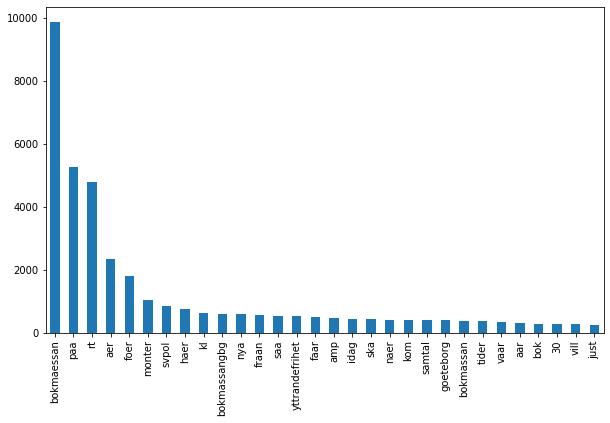

In [16]:
top_words = plot_top_words(clean_tweets, 50, 30)
top_words

**F13** Hur många gånger måste ett ord finnas i corpuset för att finnas med i `top_words` så som den är skriven ovan?

In [17]:
top_words.min() # prints the lowest value from the corpus

183

**F13 Svar:** top_words ovan plottar ut de 30 vanligaste orden av en serie på 50 ord. Det sista ordet i serien har 183 förekommanden så ordet måste ha fler än 183 för att vara med i serien. För att plottas ut måste ordet förekomma fler än 270 gånger. 
I själva funktionen plot_top_words tycks den lägga till alla ord som förekommer fler än 1 gånger i en "serie", men de som plottas ut och returneras är det antal som inkommer i parametrarna. 

**F14.** Hur många ord plottas i stapeldiagrammet? 

**F14 Svar:** 30 ord. Detta avgörs genom inargumentet top_words i plot_top_words.

### Små bokstäver

Nästa steg i pre-processingen av vårt dataset (vårt corpus) är att göra om alla bokstäver till små. 

**F15** 

a.Utför ändringen att alla stora bokstäver blir små bokstäver i `clean_tweets` och spara i en ny variabel kallad `tweets_lowered`

b.Varför vill man göra det för vår analys?


In [18]:
# F15 a)  
# Converting all strings in series to lowercase
tweets_lowered = clean_tweets.str.lower()
# Check if only lowercase (should print True)
tweets_lowered.str.islower().any() 
tweets_lowered

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3        tillbakablick paa #bokmaessan #goeteborg del 1  
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F15 b) Svar:** Det hjälper att ta bort delar i data som inte är hjälpsamt (noise). Detta kan bland annat göras genom att göra om all text till små bokstäver, vilket ökar enkelheten i datan. Detta hjälper med att upprätthålla ett konsistent flöde när man använder tekniker i NLP och text mining.

**F16** Räkna ut en ny variabel med de mest förekommander (frekventa) orden, döp den till `top_words_lowered`

bokmaessan         9858
paa                5256
rt                 4805
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
kl                  648
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
vaar                366
aar                 306
bok                 284
30                  278
vill                278
just                270
plats               265
se                  260
kommer              259
in                  254
itorget             247
20                  235
boecker             233
10                  233
daer                231
finns               227
pratar              226
tack            

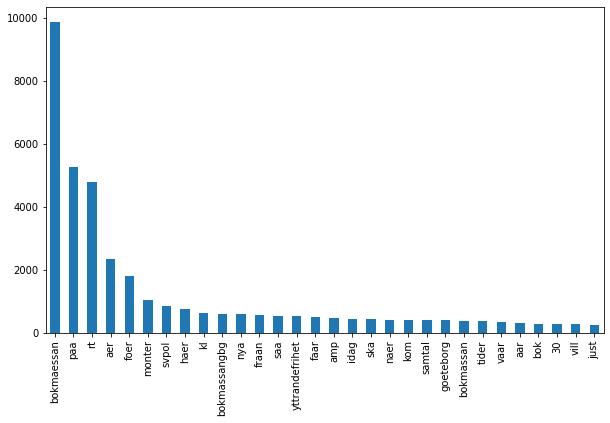

In [19]:
#Skriv klart denna kodcell för F1.16

top_words_lowered = plot_top_words(tweets_lowered , 50, 30)
top_words_lowered

**F17.** Har något förändrats, vad? Förklara svaret.

**F17 Svar:** Inget har förändrats. CountVectorizer som anropas i metoden ändrar till lowercase automatiskt om detta inte ställs in.

För att underlätta att jämföra vad våra ansträngningar får för resultat kan det vara bra att enkelt kunna jämföra olika listor med top_words.

**F18** Skapa en ny dataframe som har två kolumner, en med de 20 mest frekventa orden från`top_words` och en med de 20 mest frekventa orden från `top_word_lowered`. Döp kolumnerna till `Top tweeted clean`och  `Top tweeted lowered`. 

In [20]:
pd.DataFrame({
    'Top tweeted clean': top_words[0:20].index,
    'Top tweeted lowered': top_words_lowered[0:20].index
})

,Top tweeted clean,Top tweeted lowered
0,bokmaessan,bokmaessan
1,paa,paa
2,rt,rt
3,aer,aer
4,foer,foer
5,monter,monter
6,svpol,svpol
7,haer,haer
8,kl,kl
9,bokmassangbg,bokmassangbg


Ett annnat sätt att göra ungefär samma sak, fast lite mer automatiskt är nedanstående kod som också jämför de första 20 orden. Gör om den så att den istället för att jämföra de 20 mest frekventa orden, jämför de ord som är minst förekommande i de två listorna `top_words`och `top_words_lowered`.

**F19** Vad returnerar nedanstående kodrad om de två listor som jämförs är identiska? Vad returneras om de inte är identiska?

In [21]:
# Just to demonstrate 20 least frequent words
print(f'{top_words[:-21:-1]}\n')

# Returns set() which means lists are equal.
print(f'{set(top_words[:-21:-1].index) - set(top_words_lowered[:-21:-1].index)}\n')

l1 = ['1','3','6','5','9']
l2 = ['1','4','6','8','7']

# Returns the different values in l1 compared to l2.
set(l1)-set(l2)

bara               183
saeger             184
seminarium         191
bibliotek          198
charlieafnord      204
15                 206
pedagogikscenen    210
varfoer            216
tack               216
pratar             226
finns              227
daer               231
10                 233
boecker            233
20                 235
itorget            247
in                 254
kommer             259
se                 260
plats              265
dtype: int64

set()



{'3', '5', '9'}

**F19 Svar:** Om listorna är identiska returneras set(). Om listorna inte är identiska returneras de strängar som skiljer sig från den andra från den första listan i syntaxen. I set(l1)-set(l2) visas det t.ex. att det är 3, 5, & 9 som skiljer l1 mot l2.

In [22]:
set(top_words[0:20].index) - set(top_words_lowered[0:20].index)

set()

### Korta ord

Korta ord har ofta inte någon egentlig betydelse, alltså behöver vi inte dessa ord. Typiska sådana ord kan vara ja, jo eller nej. Vi bestämmer oss för att alla ord som är kortare än 3 bokstäver inte innehar någon betydelse i vår analys och tar därmed bort dem. 

**F20** Ta bort alla ord med färre bokstäver än 3(HINT: [regular expressions](https://docs.python.org/3/howto/regex.html)), lägg den nya listan med ord (som inte innehåller ord med färre bokstäver än 3) i en variabel med namn `tweets_low_no_small`



In [23]:
# Demo of tweets lowered
print(f'{tweets_lowered[0:10]}\n')

# Another way to get the same result:
tweets_low_no_small = tweets_lowered.str.findall('\w{3,}').str.join(' ')

# Demo of tweets_low_no_smal
print(f'{tweets_low_no_small[0:10]}\n')

0    rt @amiethekid: kvaellens avsnitt av raseriet ...
1    maranatafoersamlingens monter paa bokmaessan v...
2    idrotten blev en trygg zon under en jobbig ton...
3     tillbakablick paa #bokmaessan #goeteborg del 1  
4    rt @flamman_: aha, vilken tid aer demon? hm, d...
5    aha, vilken tid aer demon? hm, den krockar med...
6    rt @mariabennet2000: tack lisa bjurwald - rakr...
7    rt @mvasara: haer aer den gardell ni borde lae...
8    boksmaellan aer paataglig. men hellre boksmael...
9    tack lisa bjurwald - rakryggat och otroligt vi...
Name: text, dtype: object

0    amiethekid kvaellens avsnitt raseriet hittar h...
1    maranatafoersamlingens monter paa bokmaessan v...
2    idrotten blev trygg zon under jobbig tonaarsti...
3           tillbakablick paa bokmaessan goeteborg del
4    flamman_ aha vilken tid aer demon den krockar ...
5    aha vilken tid aer demon den krockar med mina ...
6    mariabennet2000 tack lisa bjurwald rakryggat o...
7    mvasara haer aer den gardell bord

bokmaessan         9858
paa                5256
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
vaar                366
aar                 306
bok                 284
vill                278
just                270
plats               265
kommer              259
itorget             247
boecker             233
daer                231
finns               227
pratar              226
varfoer             216
tack                216
pedagogikscenen     210
charlieafnord       204
bibliotek           198
seminarium          191
saeger              184
bara            

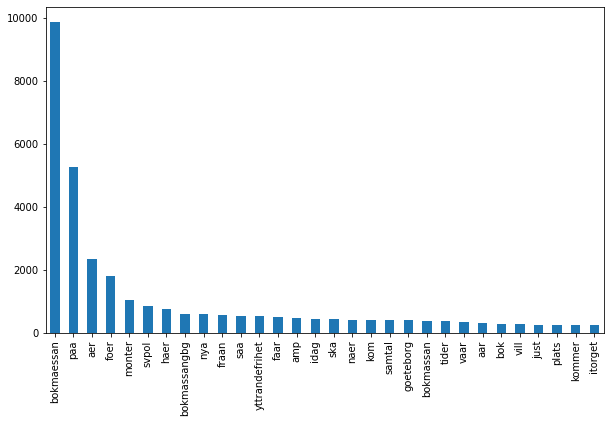

In [24]:
#Skapar ny topplista utan korta ord
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small

**F21.** Efter att korta ord tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan? 

In [25]:
print(f'Minimum value: {top_words_low_no_small.min()}')

Minimum value: 169


**F21 Svar:** 169 ggr. För plot: 247.

### Betydelselösa ord

Stop words är andra ord som inte är korta men som ändå inte har betydelse, dessa kan vara lite besvärligare att identifiera och ta bort. En möjlighet är att helt enkelt skapa en lista med sådana ord och sedan använda den listan för att filtrera ut orden ur ett corpus. Vi har ju redan tagit bort alla ord med färre bokstäver än 3, så sådana behöver vi inte lägga in i listan. 

Nedan är ett exempel på en lista med stoppord som är betydelselösa. 


In [26]:
my_stop_words = ["och", "det", "att", "i", "en", "jag", "hon", 
                "som", "han", "paa", "den", "med", "var", "sig", 
                "foer", "saa", "till", "aer", "men", "ett", 
                "om", "hade", "de", "av", "icke", "mig", "du", 
                "henne", "daa", "sin", "nu", "har", "inte", 
                "hans", "honom", "skulle", "hennes", "daer", 
                "min", "man", "ej", "vid", "kunde", "naagot", 
                "fraan", "ut", "naer", "efter", "upp", "vi", 
                "dem", "vara", "vad", "oever", "aen", "dig", 
                "kan", "sina", "haer", "ha", "mot", "alla", 
                "under", "naagon", "eller", "allt", "mycket", 
                "sedan", "ju", "denna", "sjaelv", "detta", 
                "aat", "utan", "varit", "hur", "ingen", "mitt", 
                "ni", "bli", "blev", "oss", "din", "dessa", 
                "naagra", "deras", "blir", "mina", "samma", 
                "vilken", "er", "saadan", "vaar", "blivit", 
                "dess", "inom", "mellan", "saadant", "varfoer", 
                "varje", "vilka", "ditt", "vem", "vilket", 
                "sitta", "saadana", "vart", "dina", "vars", 
                "vaart", "vaara", "ert", "era", "vilka"]

När vi skapat vår lista är det dags att skapa en funktion som tar bort dessa från ett dokument. Denna funktion är kodad i cellen nedan. (Igen strunta i lambda för tillfället.)

In [27]:
remove_stopwords = lambda x: ' '.join(y for y in x.split() if y not in my_stop_words)

Funktionen ovan tar alltså bort stoppord från ett dokument (alltså en tweet), för att ta bort stoppord från hela vårt corpus kan funktionen `.apply()`användas. 

**F22.** Skriv den kod som tar bort alla stoppord från `tweets_low_no_small` och skapar en ny variabel `tweets_low_no_small_stopwords` för corpuset utan stoppord.

In [28]:
tweets_low_no_small_stopwords = tweets_low_no_small.apply(remove_stopwords)

bokmaessan         9858
monter             1052
svpol               850
bokmassangbg        604
nya                 595
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
aar                 306
bok                 284
vill                278
just                270
plats               265
kommer              259
itorget             247
boecker             233
finns               227
pratar              226
tack                216
pedagogikscenen     210
charlieafnord       204
bibliotek           198
seminarium          191
saeger              184
bara                183
dag                 183
lyssna              182
vaelkommen          178
c04                 176
hos                 176
missa               175
barn                175
skaems              169
bra                 169
maaste          

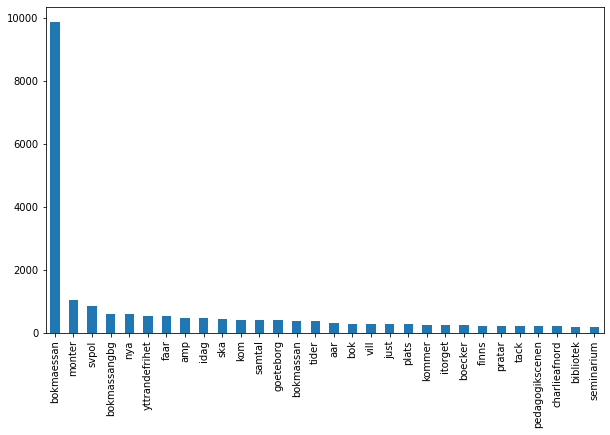

In [29]:
top_words_low_no_small_stopwords = plot_top_words(tweets_low_no_small_stopwords, 50, 30)
top_words_low_no_small_stopwords

**F23.** Efter att stopporden tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan? 

**F24.** Vad är skillnaderna mellan de frekvent förekommande orden i jämförelse med våra tidigare listor? Skriv den kod som jämför dessa tre listor `top_words_lowered`, `top_words_low_no_small` and `top_words_low_no_small_stopwords`, titta på de första 20 orden i listorna.


In [30]:
# F24

pd.DataFrame({
    'Top tweeted lowered': top_words_lowered[0:20].index,
    'Top tweeted low no small': top_words_low_no_small[0:20].index,
    'Top tweeted low no small stopwords': top_words_low_no_small_stopwords[0:20].index
})

,Top tweeted lowered,Top tweeted low no small,Top tweeted low no small stopwords
0,bokmaessan,bokmaessan,bokmaessan
1,paa,paa,monter
2,rt,aer,svpol
3,aer,foer,bokmassangbg
4,foer,monter,nya
5,monter,svpol,yttrandefrihet
6,svpol,haer,faar
7,haer,bokmassangbg,amp
8,kl,nya,idag
9,bokmassangbg,fraan,ska


**F24 Svar:** Skillnaderna är att den första bara filtrerat bort stora bokstäver, den andra har filtrerat bort alla korta ord, och den tredje har inte med s.k. "stopwords". Alla listor innehåller alltså olika "top tweets".

### Visualisering och rekommendation

Dags att visualisera vårt resultat och övertyga vår klient om att vi hittat de bästa debattämnena för dem! Här gör vi det genom att skapa ett word cloud där de mest frekventa orden syns bäst. 

Nedanstående kod skapar ett ordmoln för `top_words_low_no_small_stopwords`

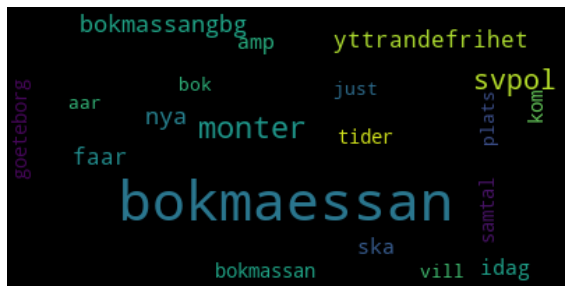

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Changing maximum amount fo words displayed to 20, which means just the top 20 words will be allowed.
wordcloud = WordCloud(max_font_size=40, max_words =20)
#wordcloud.fit_words(plot_top_words(clean_tweets, 200, 30).to_dict()) # use this to print lots of words
wordcloud.fit_words(top_words_low_no_small_stopwords.to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**F25** Ändra i tidigare kod hur många gånger ett ord minst måste finnas för att det ska inkluderas i ordmolnet. Vad förändras?

**F25 Svar:** Ändrade max antalet ord som ska visas, vilket innebär att tröskeln för att komma med i molnet blir även den blir högre. Skillnaden är att färre ord visas och att det blir tydligare att sålla ut de mest populära ämnena.


**F26** När du tittar på ordmolnet, är det fler ord som borde vara stoppord? Ange några stycken och förklara varför de bör tas bort.

**F26 Svar:** "pandark2083" kan vara ett user_name där man glömt ha med @{user_name}, denna skulle därför kunna tas bort med hjälp av stoppord. "c04" är ett ord som inte säger så mycket, "itorget" kan tänkas vara en ihopskrivning av "i torget", ord som "hos", "nya", "ska", "aar", "faa" är ord som inte ger så mycket information så dessa skulle kunna tas bort. Det är möjligt att "amp" kommer ifrån html då en HTML-entitet är: "& amp;"

**F27.** Vilket tema rekommenderar ni att publicisten ska ha som debattämne? Förklara svaret. 

**F27 Svar:** Efter att ha sållat ner till 20 mest populära finner vi att yttrandefrihet är det tema vi upplever mest relevant. De flesta övriga i topp 20 är relaterade till mässan i sig än att vara specifika debattämnen. Detta kan även stärkas med https://bokmassan.se/2016/05/bokmassan-firar-det-fria-ordet/ 
Väldigt många av de populäraste orden kan länkas till Bokmässan i Göteborg som handlar om yttrandefrihet och tycks ha ägt rum 2020.

**F28.** Ni har nu arbetat med textdata, hur är det annorlunda när det gäller pre-processing jämfört med annan typ av data som är av mer numerisk eller kategorisk karaktär?

**F28 Svar:** Textdata innebär att man får förfina och ändra större sammansatta klumpar av information. Det finns andra utmaningar som att ta bort onödiga ord, emojis länkar och vad situationen nu kräver. I detta fall krävdes även t.ex. också räknande av förekomsten av varje ord. Vår uppfattning är att det möjligtvis är ännu viktigare att verkligen analysera innehållet och reflektera kring vad det är man vill utvinna när det gäller textdata.

Det krävs alltså en annan typ av pre-processing, som encoding och att man tar bort emojis och URL's. Det verkar finnas många olika sätt att "pre-processa" datan på när det är i textform eftersom det beror på vad man är ute efter i texten.

---
*När ni besvarat samtliga frågor och all er kod fungerar i enlighet med instruktioner*, spara ert arbete som HTML och ladda upp på Studium för laboration 2, eller länka till er Notebook på Collaboratory. 

** Glöm inte att versionshantera i GitHub så att jag kan följa ert arbete!** 

Lycka till!